In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv('../GitHub/python-ml-course/datasets/customer-churn-model/Customer Churn Model.txt')

In [3]:
data.tail()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False.


In [4]:
data.shape

(3333, 21)

### Scatter plot

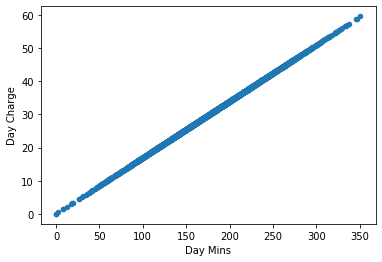

In [5]:
data.plot(kind='scatter',x="Day Mins",y="Day Charge")

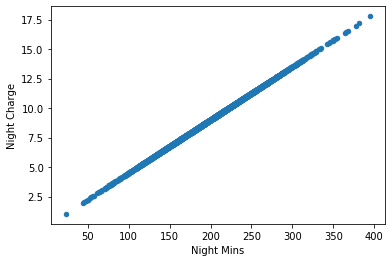

In [6]:
data.plot(kind='scatter',x="Night Mins",y="Night Charge")

Creando la figura y los ejes (fig, axes). Se pueden nombrar los ejes directamente y no necesariamente con las posiciones de los paneles.

**- fig,[ax1,ax2]=plt.subplots(1,2). Por cada fila se genera una lista con los axes**

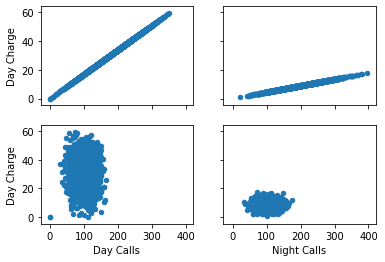

In [7]:
figure,[[ax1,ax2],[ax3,ax4]]=plt.subplots(2,2,sharex=True,sharey=True)
data.plot(kind='scatter',x='Day Mins',y='Day Charge',ax=ax1)
data.plot(kind='scatter',x='Night Mins',y='Night Charge',ax=ax2)
data.plot(kind='scatter',x='Day Calls',y='Day Charge',ax=ax3)
data.plot(kind='scatter',x='Night Calls',y='Night Charge',ax=ax4)

# ax2.set_xlabel("Day mins")

### Histogramas de frecuencias

Para conocer el número de bins que se debe usar se aplica la regla de Sturges

\begin{equation}
bins=1+log_{2}(M)
\end{equation}

Text(0.5, 1.0, 'Histograma del número de llamadas al día')

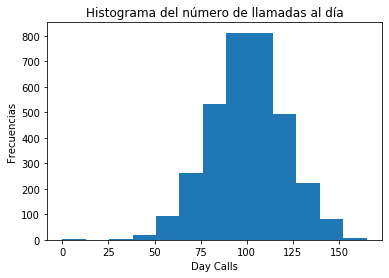

In [8]:
b=int(np.ceil(1+np.log2(data.shape[0]))) #np.ceil para redondear por encima 
plt.hist(data['Day Calls'],bins=b)
plt.xlabel("Day Calls")
plt.ylabel("Frecuencias")
plt.title("Histograma del número de llamadas al día")

### Diagrama de caja y bigotes (boxplot)

- El borde inferior de la caja define el percentil 25
- El borde superior de la caja define el percentil 75
- La línea amarilla es el percentil 50

Text(0.5, 1.0, 'Boxplot de las llamadas diarias')

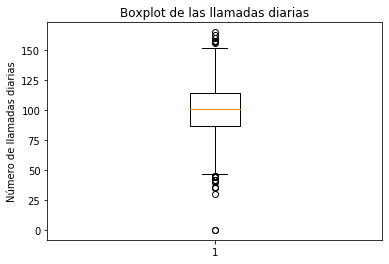

In [9]:
plt.boxplot(data["Day Calls"])
plt.ylabel("Número de llamadas diarias")
plt.title("Boxplot de las llamadas diarias")

La altura de la caja es la resta entre el percentil 75 y el percentil 25. Se llama rango interquantilico (Inter quantil range, IQR)

In [10]:
data["Day Calls"].describe()
IQR=data["Day Calls"].quantile(0.75)-data["Day Calls"].quantile(0.25)

Para el ejemplo, el IQR es igual a {{IQR}}

Los bigotes se colocan a 1.5 veces el IQR tanto desde el cuantil 25 como del 75. Todos los valores que queden por fuera de estos bigotes se consideran outliers y se marcan con 'o'. Estos datos tienen esta condición fruto de un error en la medición o de condiciones específicas que lo generaron *(Es importante revisar su origen)*

In [11]:
bigote_inf=data["Day Calls"].quantile(0.25)-1.5*IQR
bigote_sup=data["Day Calls"].quantile(0.75)+1.5*IQR

bigote_inf,bigote_sup

(46.5, 154.5)